In [ ]:
!gdown 1Jo39e90VzsYiuJM3VIevXvpV2KXDYhrj

Downloading...
From: https://drive.google.com/uc?id=1Jo39e90VzsYiuJM3VIevXvpV2KXDYhrj
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 6.14MB/s]


In [ ]:
import pandas as pd
df= pd.read_csv('bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


Before further data exploration, the preliminary step is to check if data is complete and has all the required details. Here, we check basic features of data frame using info() method,


*   Total features - 11
*   Data count - 10886
*   No of numerical columns - 10
*   No of categorical columns - 1

Sufficient details are present for the next stage of data analysis. Non-Null count column does not indicate any features having null values. We validated the same by using the isna() function. The function sums the count of null values in each column. The result is 0 for all the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


After analysis using value_counts() function, numerical columns that are categorical in nature(limited number of values) are recategorized,
<ol>
  <li>Categorical Columns</li>
    <ol>
      <li>datetime</li>
      <li>season</li>
      <li>holiday</li>
      <li>workingday</li>
      <li>weather</li>
    </ol>
  </li>
  <li>Numerical Columns</li>
    <ol>
      <li>temp</li>
      <li>atemp</li>
      <li>humidity</li>
      <li>windspeed</li>
      <li>casual</li>
      <li>registered</li>
      <li>count</li>
    </ol>
  </li>
</ol>

**So, in total 5 categorical columns and 7 numerical columns**

**Missing value and Outlier detection and treatment.**

---


Along with checking for null values, we should also detect any outlier values present in different columns in data. Depending on the column and how many outliers are present, we might or might not need to fix for outliers.

Here, for detecting outliers, we use a simple visualization technique called boxplot. The boxplot gives descriptive information on a column including the mean, median, 25 percentile, 50 percentile and 75 percentile. Along with this, It also plots the outliers(if any) on the positive and negative side

Let's plot boxplots for 4 features related to weather(temp, atemp, humidity, windspeed)

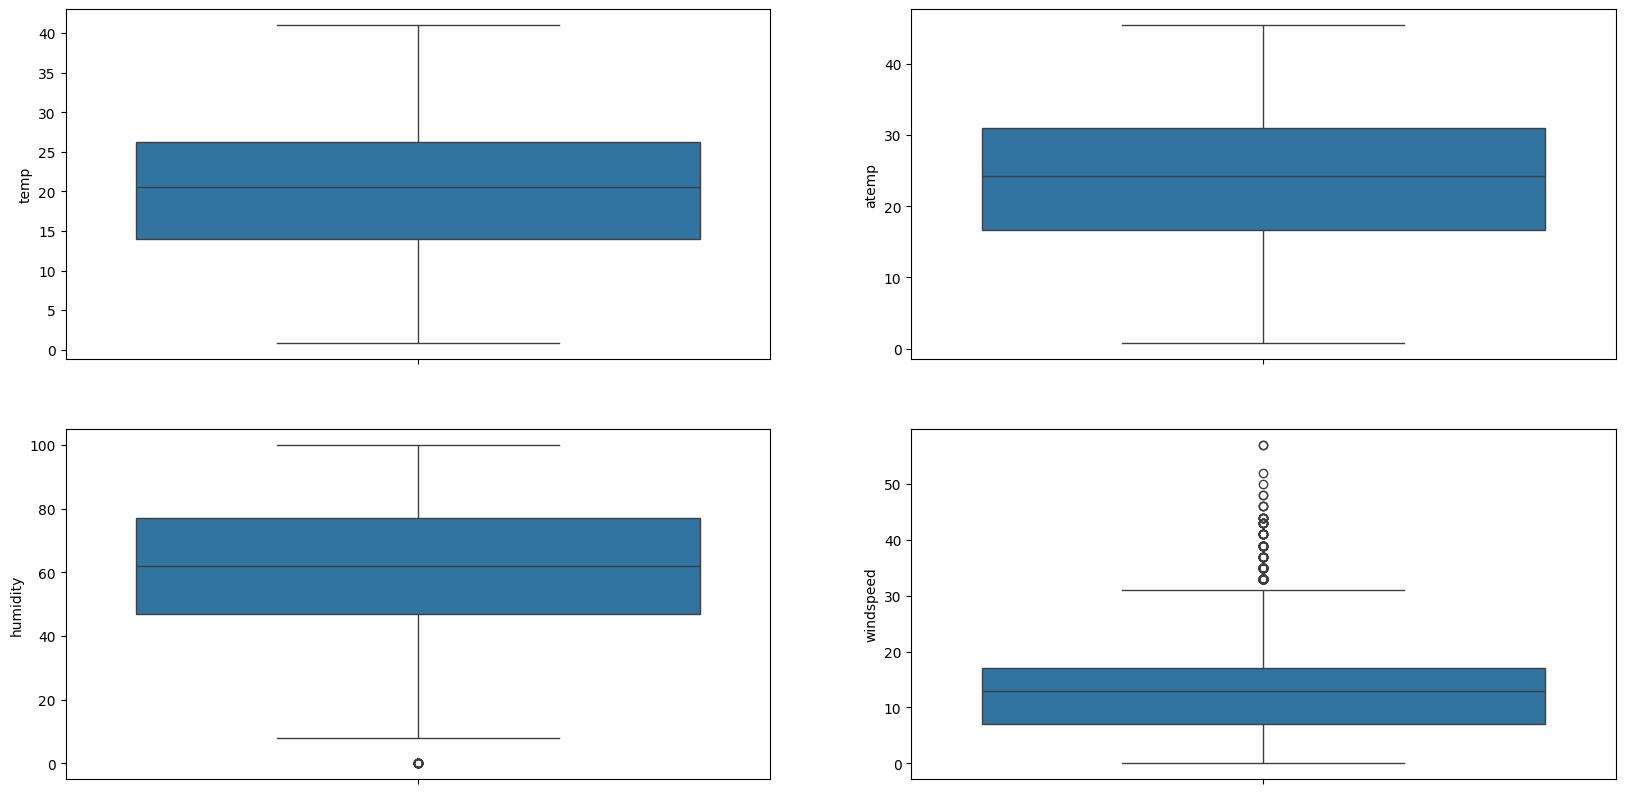

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['temp'])

plt.subplot(2,2,2)
sns.boxplot(df['atemp'])

plt.subplot(2,2,3)
sns.boxplot(df['humidity'])

plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])

plt.show()

**Observations**
* temp, atemp and humidity have few or no outliers
* windspeed has more significant number of outliers. However, the range of outliers(30 to 55) are not totally out of acceptable bounds. These can be explained by extreme weather events in certain days of the year. Hence these outliers are valid and can be considered for further analysis

Now, Let's plot boxplots for remaining numerical columns related to electric cycle users(casual, registered, count)

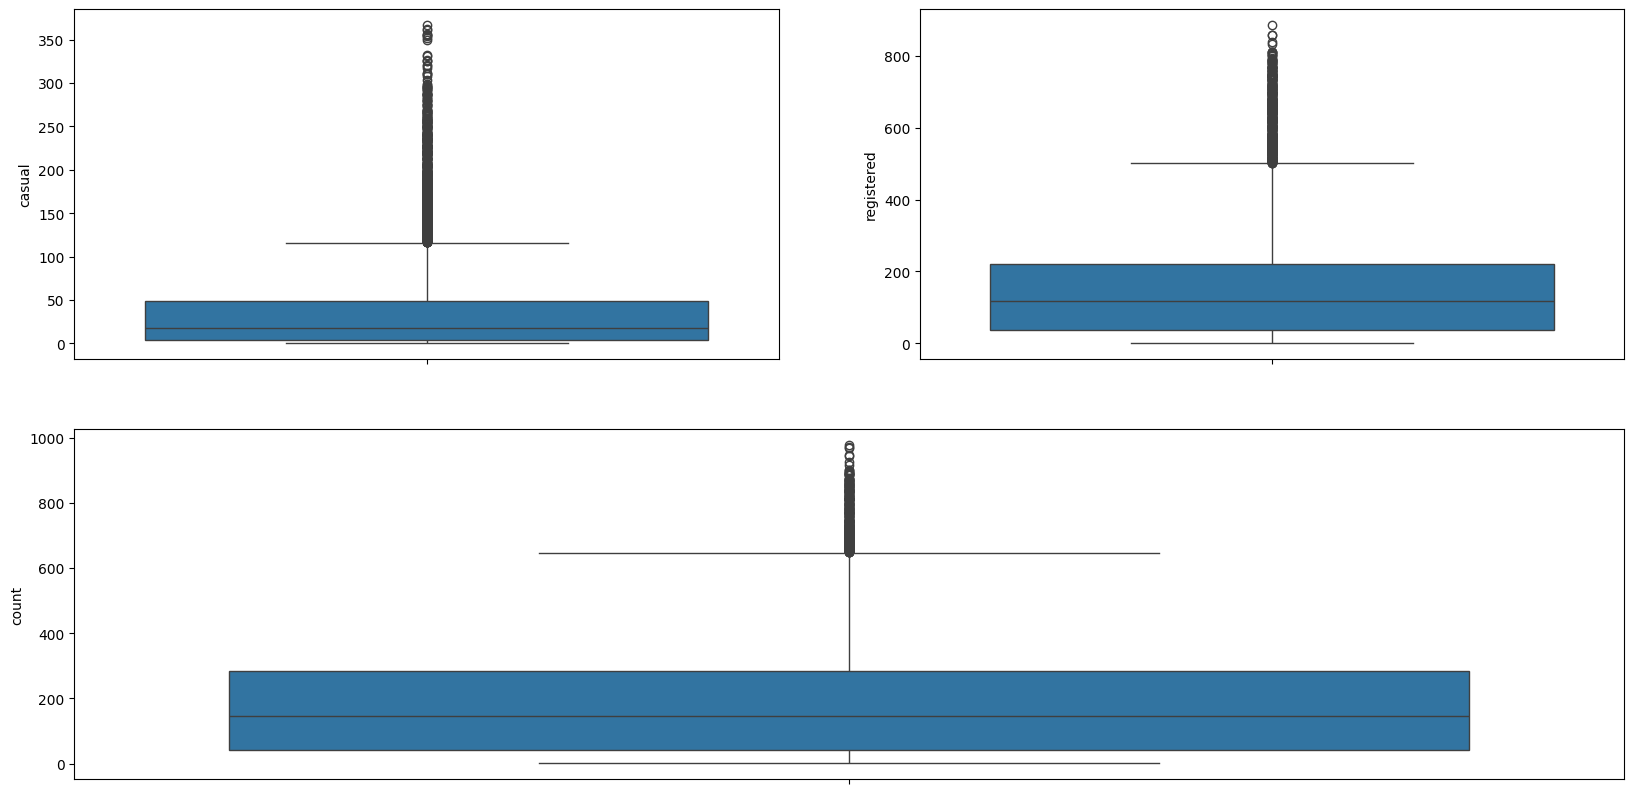

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(df['casual'])

plt.subplot(2,2,2)
sns.boxplot(df['registered'])

plt.subplot(2,1,2)
sns.boxplot(df['count'])
plt.show()

**Statistical summary of numerical columns:**

In [ ]:
df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observations**
* There are significant outliers in all three columns: casual, registered, count
* These outliers are explained by expected user behavior. Since the increased counts are observed in back to back days, it's possible that there was a marketing campaign offering free/discounted rides
* So, there is no treatment required for these values

**Expand on Categorical Columns:**
The columns season, holiday, workingday, weather uses numerical values for data. For clarity, let's convert it to actual categories ,

season
*   1: Spring
*   2: Summer
*   3: Fall
*   4: Winter

holiday
*   0: Non-Holiday
*   1: Holiday

workingday
*   0: Non-Workingday
*   1: Workingday

weather
*   1: Clear
*   2: Misty
*   3: LightSnow/Rain
*   4: HeavySnow/Rain

Also, let's convert datetime column to pandas datetime object. This will help later during analysis


In [ ]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'LightSnow/Rain',
    4: 'HeavySnow/Rain'
}
df['season'] = df['season'].map(season_mapping)
df['holiday'] = df['holiday'].apply(lambda row: 'Non-Holiday' if row==0 else 'Holiday')
df['workingday'] = df['workingday'].apply(lambda row: 'Non-Workingday' if row==0 else 'Workingday')
df['weather'] = df['weather'].map(weather_mapping)
df['datetime'] = pd.to_datetime(df['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,Non-Holiday,Non-Workingday,Clear,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,Spring,Non-Holiday,Non-Workingday,Clear,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,Non-Holiday,Non-Workingday,Clear,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,Non-Holiday,Non-Workingday,Clear,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,Spring,Non-Holiday,Non-Workingday,Clear,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,Non-Holiday,Workingday,Clear,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,Non-Holiday,Workingday,Clear,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,Winter,Non-Holiday,Workingday,Clear,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,Non-Holiday,Workingday,Clear,13.94,17.425,61,6.0032,12,117,129


**Univariate Analysis: Categorical Columns**

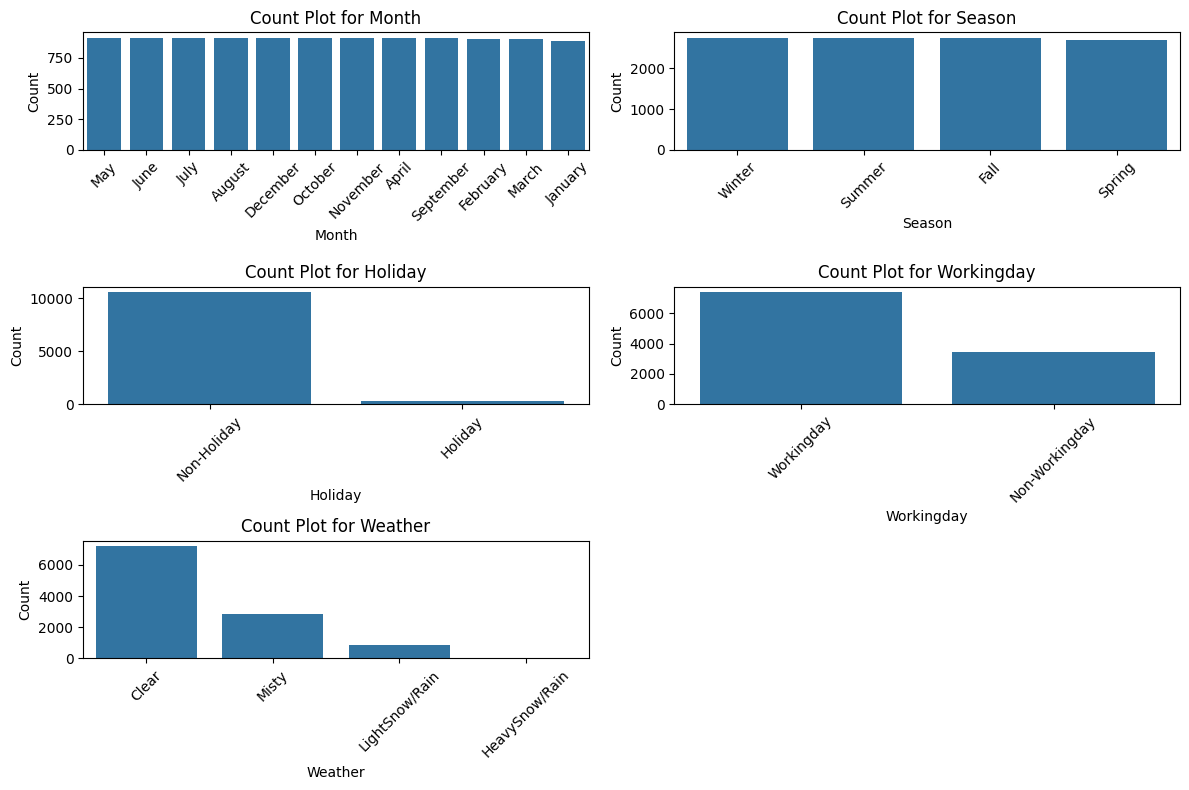

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['month'] = df['datetime'].dt.month_name()
categorical_columns = ['month', 'season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count Plot for {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations**
* Count plot for datetime was drawn by extracting month from the datetime record. Since the data was recorded consistently for every 1 hour for 2 years, total records for each month is the same
* Count plot for season also reveals the same pattern due to data recording frequency. No interesting insights are noted here
* The plot for Holiday reveals the expected pattern. The number of holiday in a year are too few.
* For Workingday plot, although the number of non working days is less when compared to workingdays, it's more than the Holidays as it includes weekends as well.
* Count plot for weather reveals that most of the days are Clear. There are significant number of days with LightSnow/Rain
* Looks like, there's not much data for HeavySnow/Rain. We will investigate further on this issue later in our analysis


**Univariate Analysis: Numerical Columns**

Distribution of Numerical columns

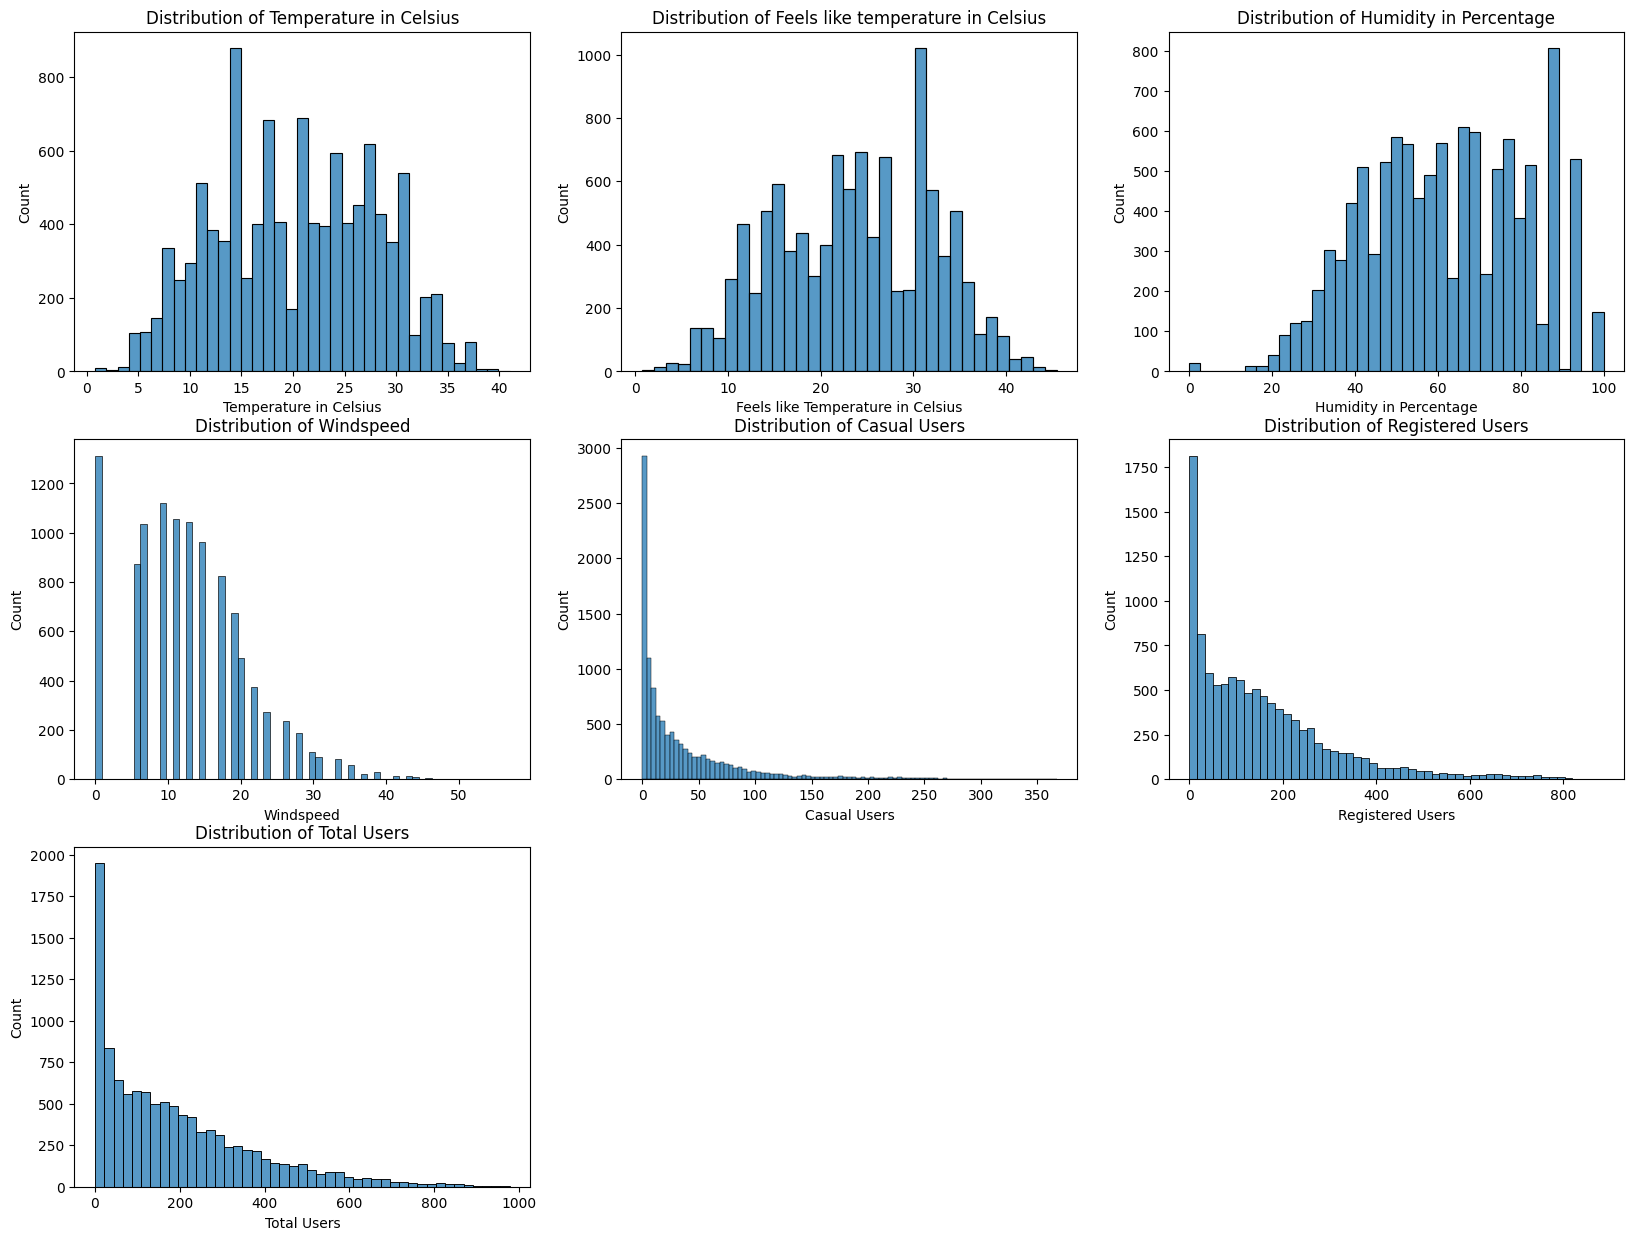

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.histplot(df['temp']).set(title="Distribution of Temperature in Celsius", xlabel='Temperature in Celsius', ylabel='Count')

plt.subplot(3,3,2)
sns.histplot(df['atemp']).set(title="Distribution of Feels like temperature in Celsius", xlabel='Feels like Temperature in Celsius', ylabel='Count')

plt.subplot(3,3,3)
sns.histplot(df['humidity']).set(title="Distribution of Humidity in Percentage", xlabel='Humidity in Percentage', ylabel='Count')

plt.subplot(3,3,4)
sns.histplot(df['windspeed']).set(title="Distribution of Windspeed", xlabel='Windspeed', ylabel='Count')

plt.subplot(3,3,5)
sns.histplot(df['casual']).set(title="Distribution of Casual Users", xlabel='Casual Users', ylabel='Count')

plt.subplot(3,3,6)
sns.histplot(df['registered']).set(title="Distribution of Registered Users", xlabel='Registered Users', ylabel='Count')

plt.subplot(3,3,7)
sns.histplot(df['count']).set(title="Distribution of Total Users", xlabel='Total Users', ylabel='Count')
plt.show()

**Observations**
* Temperature, Feels like Temperature and Humidity columns approximately follow normal distribution. Small deviations observed are acceptable and don't impact our analysis
* Windspeed, Casual Users, Registered Users and Total Users follows right skewed distribution. We need to check if these features follow log normal distribution. If they do, we can assume normal distribution for later hypothesis testing

**Check if right skewed distributions are log normal distributions:**
We will convert Windspeed, Casual Users, Registered Users and Total Users using log transformation and see if the resultant distribution is normal

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


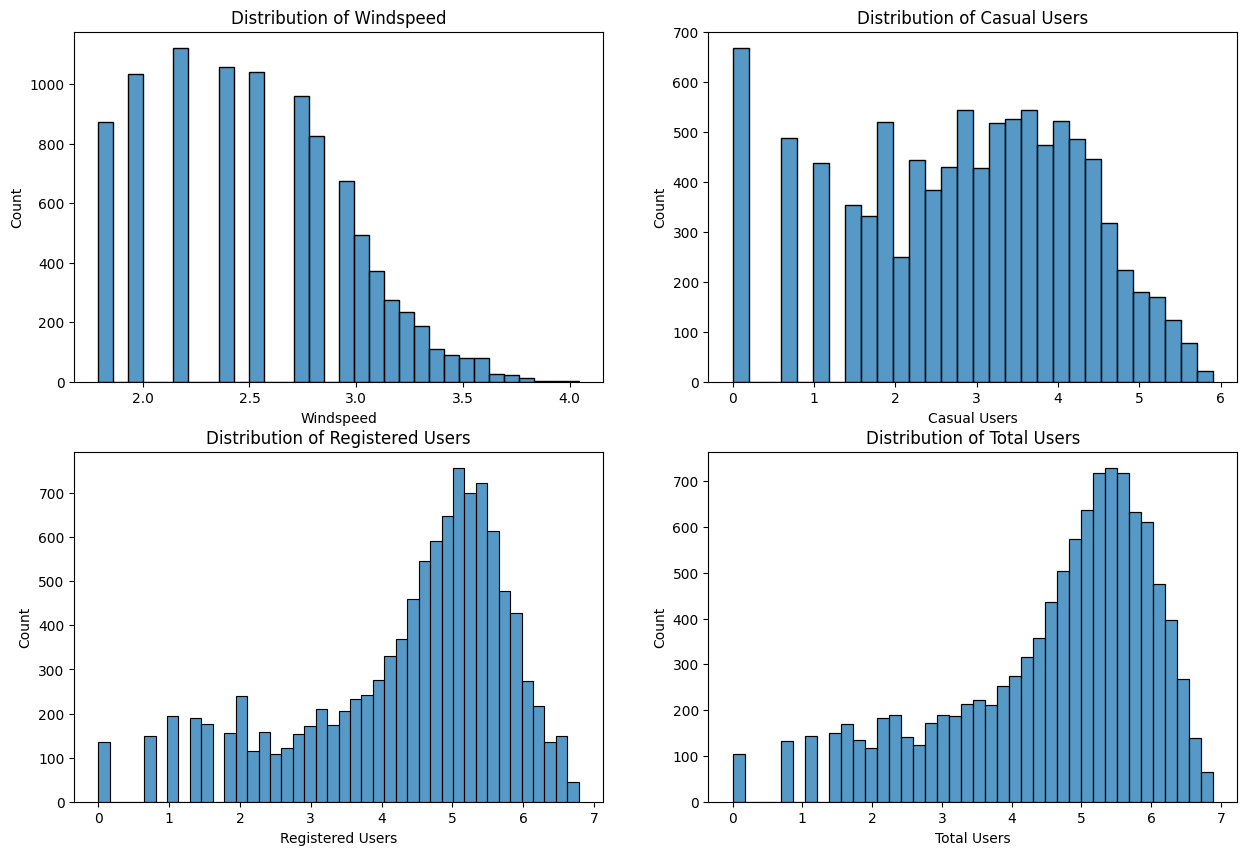

In [ ]:
import numpy as np
log_windspeed = np.log(df['windspeed'])
log_casual = np.log(df['casual'])
log_registered = np.log(df['registered'])
log_count = np.log(df['count'])

fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(log_windspeed).set(title="Distribution of Windspeed", xlabel='Windspeed', ylabel='Count')

plt.subplot(2,2,2)
sns.histplot(log_casual).set(title="Distribution of Casual Users", xlabel='Casual Users', ylabel='Count')

plt.subplot(2,2,3)
sns.histplot(log_registered).set(title="Distribution of Registered Users", xlabel='Registered Users', ylabel='Count')

plt.subplot(2,2,4)
sns.histplot(log_count).set(title="Distribution of Total Users", xlabel='Total Users', ylabel='Count')
plt.show()

**Observations**
* Windspeed and Casual Users have become close to normal. But not exactly. We will check for normality using shapiro wilkins test later
* Registered Users and Total Users have become left skewed on log transformation. So, conclusively we can say they don't follow log normal distribution. We should use one of the non parametric tests for Hypothesis testing

**Bivariate Analysis: Categorical Columns**

Let's visually understand a few features and derive insights from it

To start with,
1. How does usage vary in different seasons?

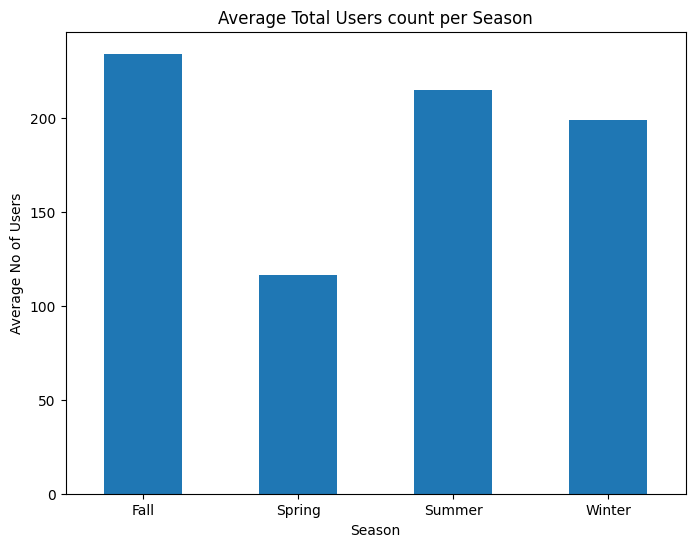

In [ ]:
season_mean= df.groupby('season')['count'].mean()

plt.figure(figsize=(8, 6))
season_mean.plot(kind='bar', rot=0)
plt.title('Average Total Users count per Season')
plt.xlabel('Season')
plt.ylabel('Average No of Users')
plt.show()

2. What is the average usage in holidays/workingdays?

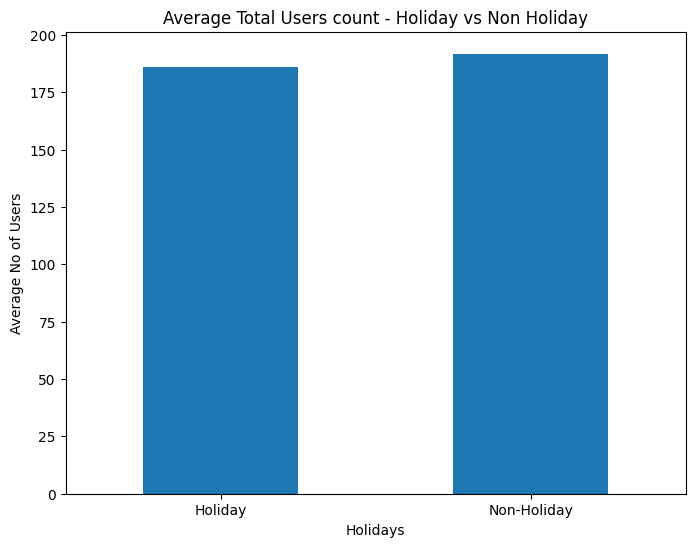

In [ ]:
df.groupby('holiday')['count'].mean()
holiday_mean= df.groupby('holiday')['count'].mean()

plt.figure(figsize=(8, 6))
holiday_mean.plot(kind='bar', rot=0)
plt.title('Average Total Users count - Holiday vs Non Holiday')
plt.xlabel('Holidays')
plt.ylabel('Average No of Users')
plt.show()

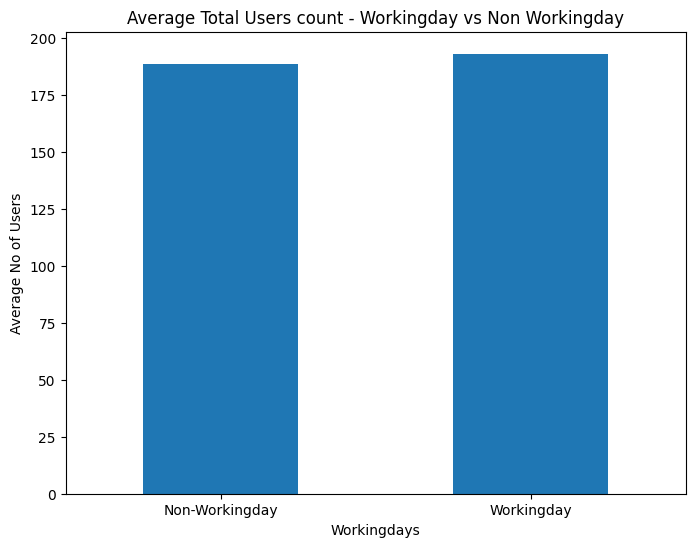

In [ ]:
workingday_mean= df.groupby('workingday')['count'].mean()

plt.figure(figsize=(8, 6))
workingday_mean.plot(kind='bar', rot=0)
plt.title('Average Total Users count - Workingday vs Non Workingday')
plt.xlabel('Workingdays')
plt.ylabel('Average No of Users')
plt.show()

3. How has Daily Counts varied over years(2011 to 2012)?

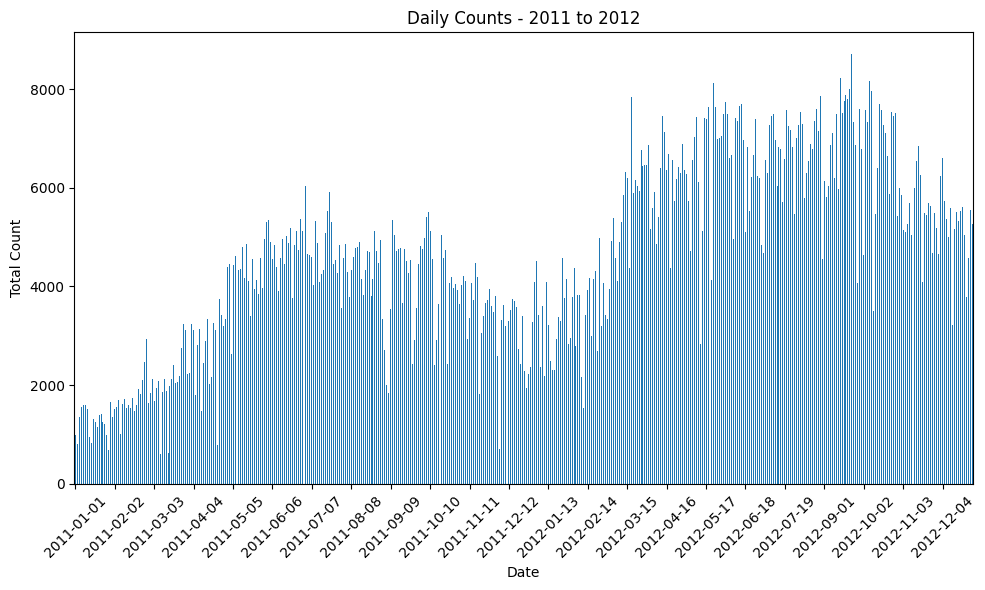

In [ ]:
daily_counts= df.groupby(df['datetime'].dt.date)['count'].sum()

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Daily Counts - 2011 to 2012')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(ticks=range(0, len(daily_counts), 20), rotation=45)
plt.tight_layout()
plt.show()

4. Which day had the highest usage?

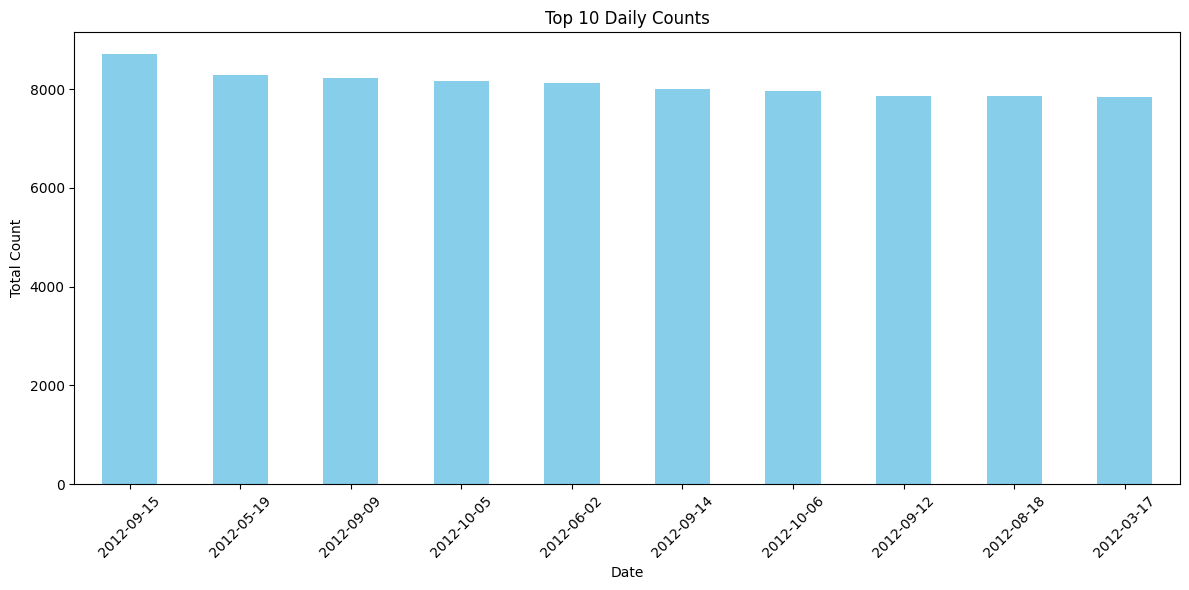

In [ ]:
import matplotlib.pyplot as plt
top_10_counts= df.groupby(df['datetime'].dt.date)['count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Daily Counts')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

4. Which time of day had the highest usage?

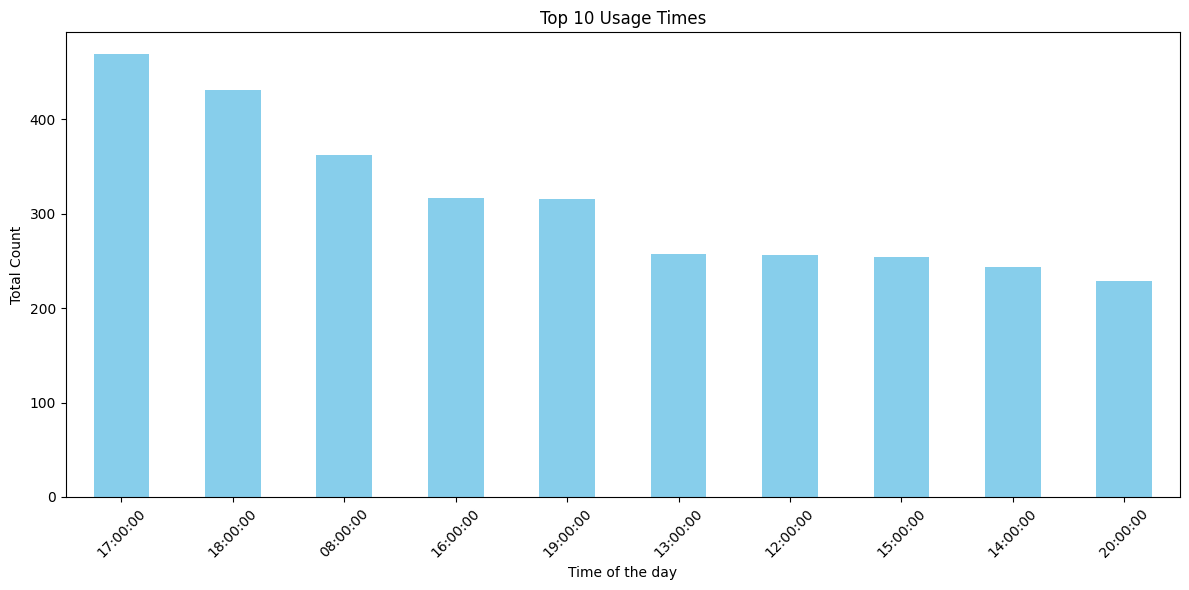

In [ ]:
top_10_timecounts=df.groupby(df['datetime'].dt.time)['count'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_timecounts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usage Times')
plt.xlabel('Time of the day')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

5. How does usage vary in different weather?

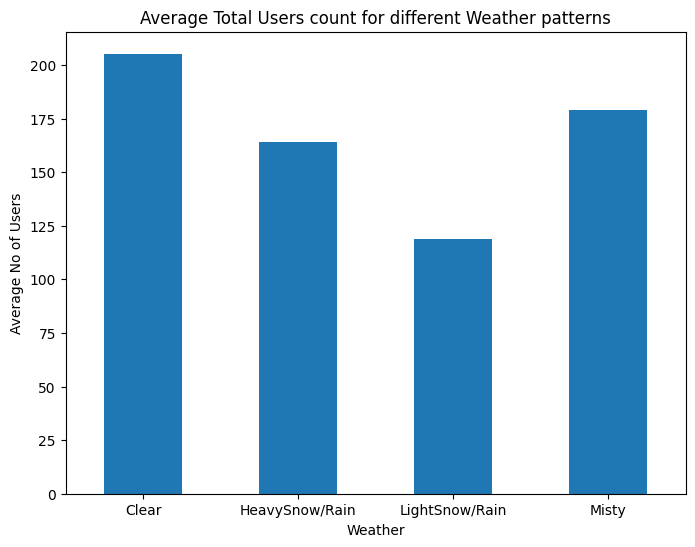

In [ ]:
weather_mean = df.groupby('weather')['count'].mean()
plt.figure(figsize=(8, 6))
weather_mean.plot(kind='bar', rot=0)
plt.title('Average Total Users count for different Weather patterns')
plt.xlabel('Weather')
plt.ylabel('Average No of Users')
plt.show()

**Observations**
* 'Fall' season had maximum usage for electric cycles followed by 'Summer'
* The average usage was marginally more during non holidays that during holidays. This indicates that users are using it more for daily commute than for leisure. But there is potential to improve on this metric.
* Similarly, the average usage was more in workingdays than non workingdays. It's also observed that the increase is very minimal.
* More usage is observed when the weather is 'Clear'(as expected)
* Surprisingly, there is increased usage during HeavySnow/Rain when compared to LightSnow/Rain. Could this be an error in metadata mapping? Or is there a real pattern of increased usage during HeavySnow/Rain? This needs to be investigated further
* Highest usage was observed on September 15, 2012 followed by May 19, 2012 along expected lines. These fall in the seasons 'fall', 'summer' respectively.
* Time series analysis for Daily users count indicates that over the two years, the number of users has increased YoY. The usage increases during fall/summer and decreases for winter/spring seasons
* Evening 5 PM is the most popular time for bike usage.
* Evening 6 PM and Morning 8 AM are second and third most popular times in a day for electric bike usage. The timings aligns with popular office commute times in morning and evening

**Bivariate Analysis**

Let's now draw boxplots for categorical columns vs count and see if it provides any insights

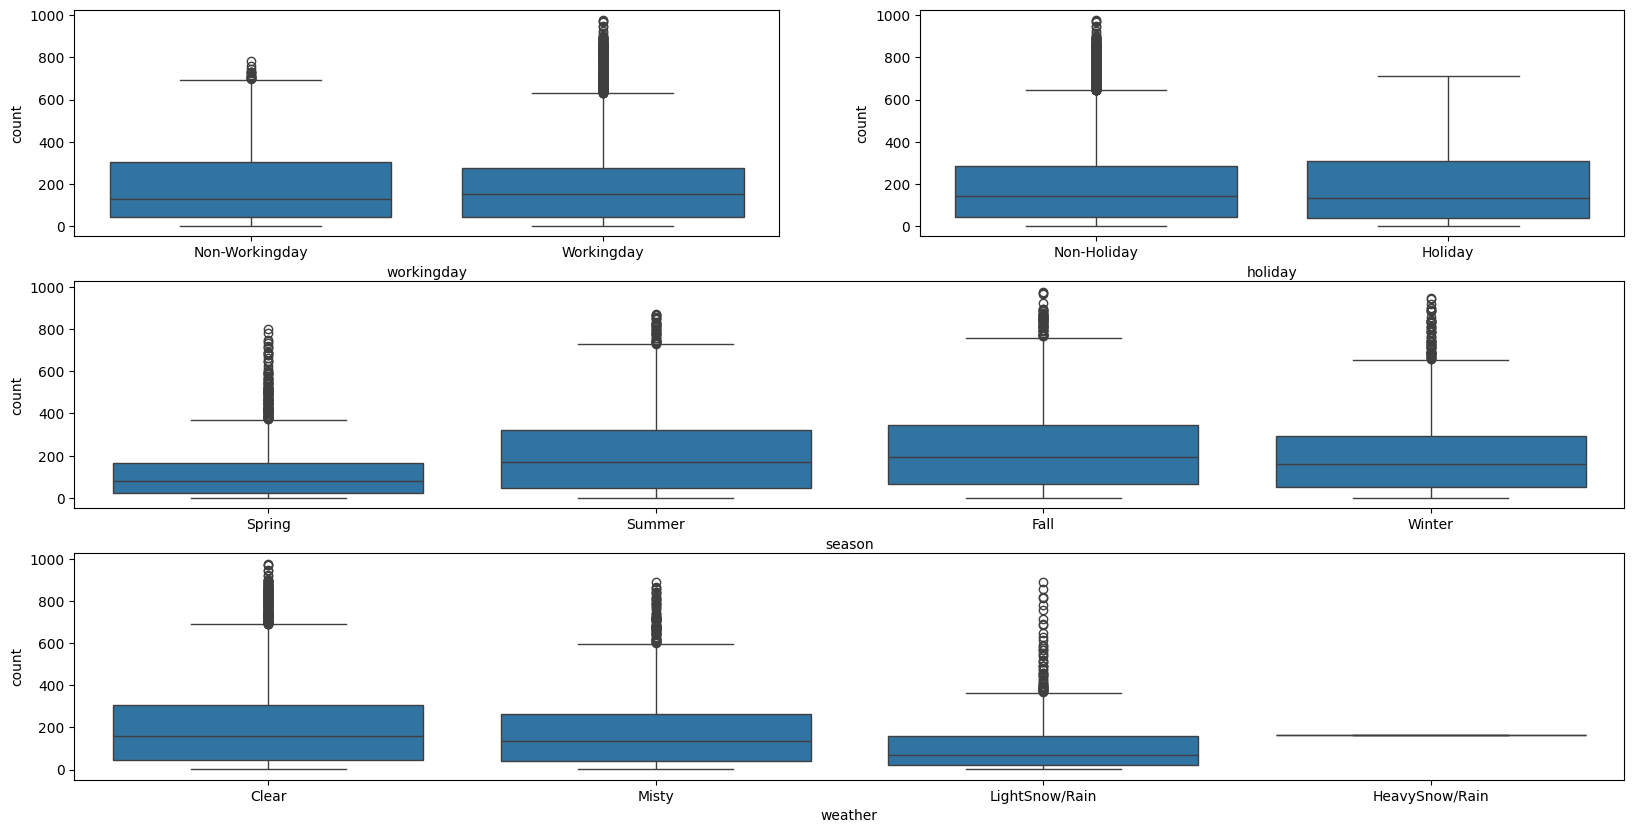

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

plt.subplot(3,2,1)
sns.boxplot(x='workingday', y='count', data=df)

plt.subplot(3,2,2)
sns.boxplot(x='holiday', y='count', data=df)

plt.subplot(3,1,2)
sns.boxplot(x='season', y='count', data=df)

plt.subplot(3,1,3)
sns.boxplot(x='weather', y='count', data=df)
plt.show()


**Observations**

* The analysis for workingday, holiday and season is consistent with what we have observed in the earlier count plots
* The boxplot for weather reveals an interesting insight. We observe that the plot does not have any variation and has a flat line. This indicates that the data is too few for this category of weather

Next steps: Let's check how many records exist for weather category 'HeavySnow/Rain'

In [ ]:
df[df['weather'] == 'HeavySnow/Rain']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
5631,2012-01-09 18:00:00,Spring,Non-Holiday,Workingday,HeavySnow/Rain,8.2,11.365,86,6.0032,6,158,164,January


Looks like we only have 1 record for 'HeavySnow/Rain' Category. Which also explains the observed discrepancy in our earlier count plot analysis

Most likely, this was a mislabeled record from 'LightSnow/Rain' Category.

We can choose to drop this record as it will skew our analysis for weather. We will consider only 3 categories of weather for our remaining analysis

In [ ]:
df = df[df['weather'] != 'HeavySnow/Rain']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10885 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10885 non-null  datetime64[ns]
 1   season      10885 non-null  object        
 2   holiday     10885 non-null  object        
 3   workingday  10885 non-null  object        
 4   weather     10885 non-null  object        
 5   temp        10885 non-null  float64       
 6   atemp       10885 non-null  float64       
 7   humidity    10885 non-null  int64         
 8   windspeed   10885 non-null  float64       
 9   casual      10885 non-null  int64         
 10  registered  10885 non-null  int64         
 11  count       10885 non-null  int64         
 12  month       10885 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 1.2+ MB


**Hypothesis Testing**
We will use different tests in Hypothesis testing to check if relationships between various features are significant or not

1. Does Working day affect the number of electric cycles rented?

Working day column has two categories(Workingday/Non-Workingday). The column count is numerical. First, Let's check what their distribution looks like

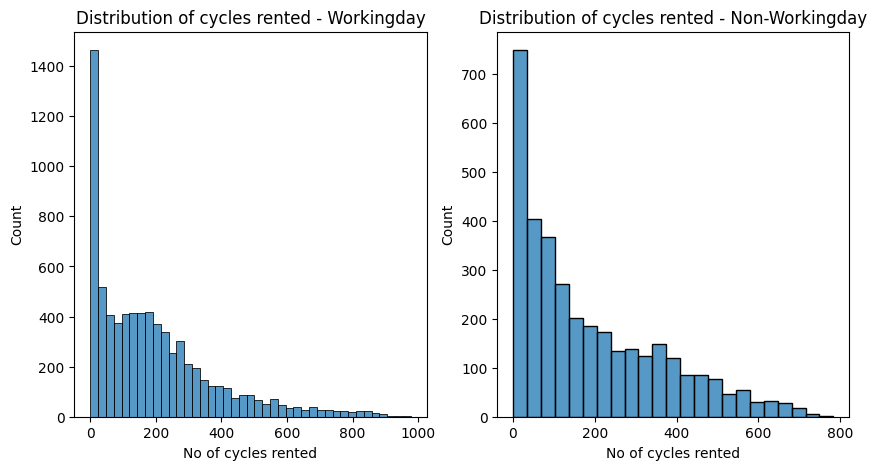

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

workingday = df[df['workingday'] == 'Workingday']['count']
nonworkingday = df[df['workingday'] == 'Non-Workingday']['count']

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(workingday).set(title="Distribution of cycles rented - Workingday", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(1,2,2)
sns.histplot(nonworkingday).set(title="Distribution of cycles rented - Non-Workingday", xlabel='No of cycles rented', ylabel='Count')

plt.show()

As we have seen before, both distributions are right skewed in nature. We also confirmed that applying log tranformation does not make it normal(it actually makes it left skewed).

Let's use a different technique to transform count to normal distribution - Box-Cox Transformation

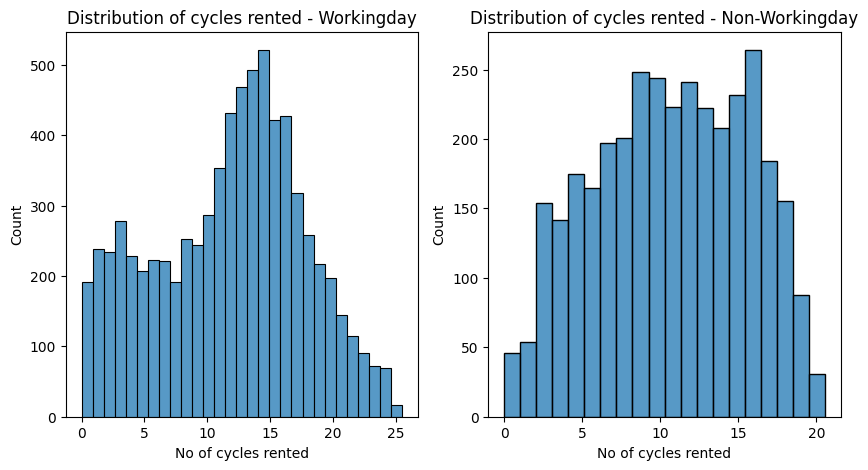

In [ ]:
from scipy.stats import boxcox
boxcox_workingday, wd_lambda = boxcox(workingday)
boxcox_nonworkingday, nwd_lambda = boxcox(nonworkingday)

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(boxcox_workingday).set(title="Distribution of cycles rented - Workingday", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(1,2,2)
sns.histplot(boxcox_nonworkingday).set(title="Distribution of cycles rented - Non-Workingday", xlabel='No of cycles rented', ylabel='Count')

plt.show()

After box-cox tranformation, the distribution does look better and close to normal. Let's test this statistically using shapiro wilkins test

In [ ]:
#Ho: Data is gaussian
#Ha: Data is not gaussian
from scipy.stats import shapiro
shapiro_stat, p_value = shapiro(boxcox_workingday)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Workingday does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Workingday follows normal distribution')
shapiro_stat, p_value = shapiro(boxcox_nonworkingday)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Non-Workingday does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Non-Workingday')

0.975986927853206 1.603007056884564e-33
Distribution of cycles rented - Workingday does not follow normal distribution
0.9758824348621762 8.140931599634956e-24
Distribution of cycles rented - Non-Workingday does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7411.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro Wilkins test confirms that the transformation did not convert the distribution to normal. We tested the same visually using QQ Plot. The results are similar

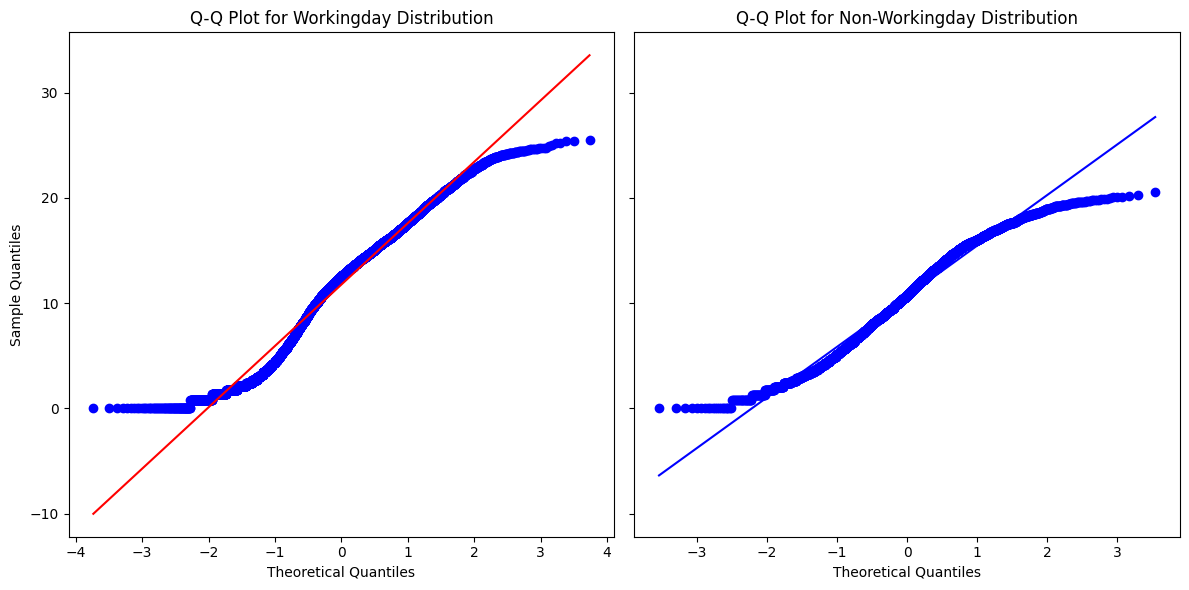

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Q-Q plot for Workingday
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
stats.probplot(boxcox_workingday, dist="norm", plot=axes[0])
axes[0].get_lines()[1].set_color('red')  # Line of best fit in red
axes[0].set_title("Q-Q Plot for Workingday Distribution")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")

# Q-Q plot for Non-Workingday
stats.probplot(boxcox_nonworkingday, dist="norm", plot=axes[1])
axes[1].get_lines()[1].set_color('blue')  # Line of best fit in blue
axes[1].set_title("Q-Q Plot for Non-Workingday Distribution")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("")

# Customize the plot
plt.tight_layout()
plt.show()

Looks like both distributions are not following normal distribution. So, we can't apply 2 Sample T-Test. So, we go for a test which deosn't require normality- kruskal walls test

In [ ]:
#Ho: Workingday/Non Workingday does not affect number of cycles rented
#Ha: Workingday/Non Workingday significantly affects the number of cycles rented
from scipy.stats import kruskal
alpha = 0.05
kruskal_stat, p_value = kruskal(workingday, nonworkingday)
print(kruskal_stat, p_value)

if p_value < alpha:
  print('Workingday/Non Workingday significantly affects the number of cycles rented')
else:
  print ('Workingday/Non Workingday does not affect number of cycles rented')

0.0017343818699882354 0.9667809735992525
Workingday/Non Workingday does not affect number of cycles rented


So, we can conclude that **Workingday/Non Workingday does not affect number of cycles rented**

**Hypothesis Testing**

2. Does weather affect the number of electric cycles rented?

Weather column has three categories(Clear, Misty, LightSnow/Rain) after removing HeavySnow/Rain category for lack of data. The comparison column 'count' is numerical. So, we should be using ANOVA test to check if weather affects the number of cycles rented. Before applying ANOVA, we need to check if the following assumptions are met,

**Assumptions of ANOVA Test**
* Independence: The observations in the three groups (Clear, Misty, LightSnow/Rain should be independent.

This seems reasonable for this dataset as each observation is a separate time period.

* Normality: The data in each group should approximately follow a normal distribution.

We can check this using a histogram, Q-Q plot, or statistical normality tests like Shapiro-Wilk.

* Equal Variances: The variances of the three groups should be roughly equal.

This can be tested using Levene’s test.

First, Let's check what their distribution looks like

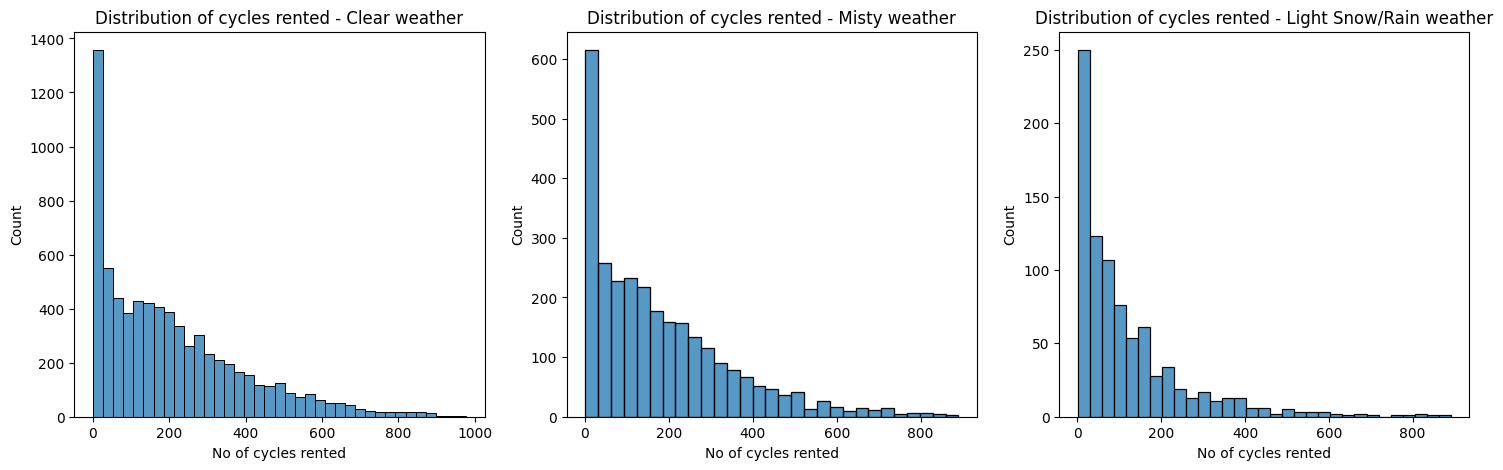

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clear_weather = df[df['weather'] == 'Clear']['count']
misty_weather = df[df['weather'] == 'Misty']['count']
lightsnowrain_weather = df[df['weather'] == 'LightSnow/Rain']['count']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(clear_weather).set(title="Distribution of cycles rented - Clear weather", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(1,3,2)
sns.histplot(misty_weather).set(title="Distribution of cycles rented - Misty weather", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(1,3,3)
sns.histplot(lightsnowrain_weather).set(title="Distribution of cycles rented - Light Snow/Rain weather", xlabel='No of cycles rented', ylabel='Count')
plt.show()

All three distributions don't look normal. Let's also verify this statistically using shapiro wilkins test

In [ ]:
#Ho: Data is gaussian
#Ha: Data is not gaussian
from scipy.stats import shapiro
shapiro_stat, p_value = shapiro(clear_weather)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Clear weather does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Clear weather follows normal distribution')
shapiro_stat, p_value = shapiro(misty_weather)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Misty weather does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Misty weather follows normal distribution')
shapiro_stat, p_value = shapiro(lightsnowrain_weather)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Light Snow/Rain weather does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Light Snow/Rain weather follows normal distribution')

0.8909259459740138 1.5964921477006555e-57
Distribution of cycles rented - Clear weather does not follow normal distribution
0.8767694973495206 9.777839106111785e-43
Distribution of cycles rented - Misty weather does not follow normal distribution
0.7674327906035717 3.875893017396149e-33
Distribution of cycles rented - Light Snow/Rain weather does not follow normal distribution


It's statistically verified that all three weather categories don't follow normal distribution.

Let's also check if the variances in each of the groups are approximately equal

In [ ]:
#Ho: Variances across the groups are same
#Ha: Variances across groups are not same

from scipy.stats import levene
alpha = 0.05
levene_stat, p_value = levene(clear_weather, misty_weather, lightsnowrain_weather)
print(levene_stat, p_value)
if p_value < alpha:
  print('Variances across three weather categories are not the same')
else:
  print ('Variances across three weather categories are same')

81.67574924435011 6.198278710731511e-36
Variances across three weather categories are not the same


Since both test of normality and variances failed, ANOVA cannot be applied here

So, we go for a test which deosn't require the above assumptions to be true, kruskal walls test

In [ ]:
#Ho: Weather does not affect the number of cycles rented
#Ha: Atleast one type of weather affects the number of cycles rented
from scipy.stats import kruskal
alpha = 0.05
kruskal_stat, p_value = kruskal(clear_weather, misty_weather, lightsnowrain_weather)
print(kruskal_stat, p_value)
if p_value < alpha:
  print('Atleast one type of weather affects the number of cycles rented')
else:
  print ('Weather does not affect the number of cycles rented')

204.95566833068537 3.122066178659941e-45
Atleast one type of weather affects the number of cycles rented


From Kruskal Walls test, we conclude **atleast one weather pattern affects the no of cycles rented.**

**Advanced Analysis:**
Note: The conclusions from the following tests are not statistically valid as assumptions for 2 Sample T Test are not met.

Let's check which group affects more by doing 2 Sample T-Tests



In [ ]:
from scipy.stats import ttest_ind
alpha = 0.05
t_stat, p_value = ttest_ind(clear_weather, misty_weather, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Clear weather increases the number of cycles rented compared to misty weather ')
else:
  print ('Clear and Misty weather have same effect on the number of cycles rented')

t_stat, p_value = ttest_ind(misty_weather, lightsnowrain_weather, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Misty weather increases the number of cycles rented compared to Light Snow/Rain weather')
else:
  print ('Misty and Light Snow/Rain weather have same effect on the number of cycles rented')

t_stat, p_value = ttest_ind(clear_weather, lightsnowrain_weather, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Clear weather increases the number of cycles rented compared to Light Snow/Rain weather')
else:
  print ('Clear and Light Snow/Rain weather have same effect on the number of cycles rented')

6.488169251217751 4.549458108254271e-11
Clear weather increases the number of cycles rented compared to misty weather 
9.53048112515673 1.3729836595136823e-21
Misty weather increases the number of cycles rented compared to Light Snow/Rain weather
13.05352692528198 7.459354885923138e-39
Clear weather increases the number of cycles rented compared to Light Snow/Rain weather


**Hypothesis Testing**

3. Does season affect the number of electric cycles rented?

Season column has four categories(Spring, Summer, Fall, Winter). The comparison column 'count' is numerical. So, we should be using ANOVA test to check if season affects the number of cycles rented. Before applying ANOVA, we need to check if the following assumptions are met,

**Assumptions of ANOVA Test**
* Independence: The observations in the four groups (Spring, Summer, Fall, Winter) should be independent.

This seems reasonable for this dataset as each observation is a separate time period.

* Normality: The data in each group should approximately follow a normal distribution.

We can check this using a histogram, Q-Q plot, or statistical normality tests like Shapiro-Wilk.

* Equal Variances: The variances of the four groups should be roughly equal.

This can be tested using Levene’s test.

First, Let's check what their distribution looks like

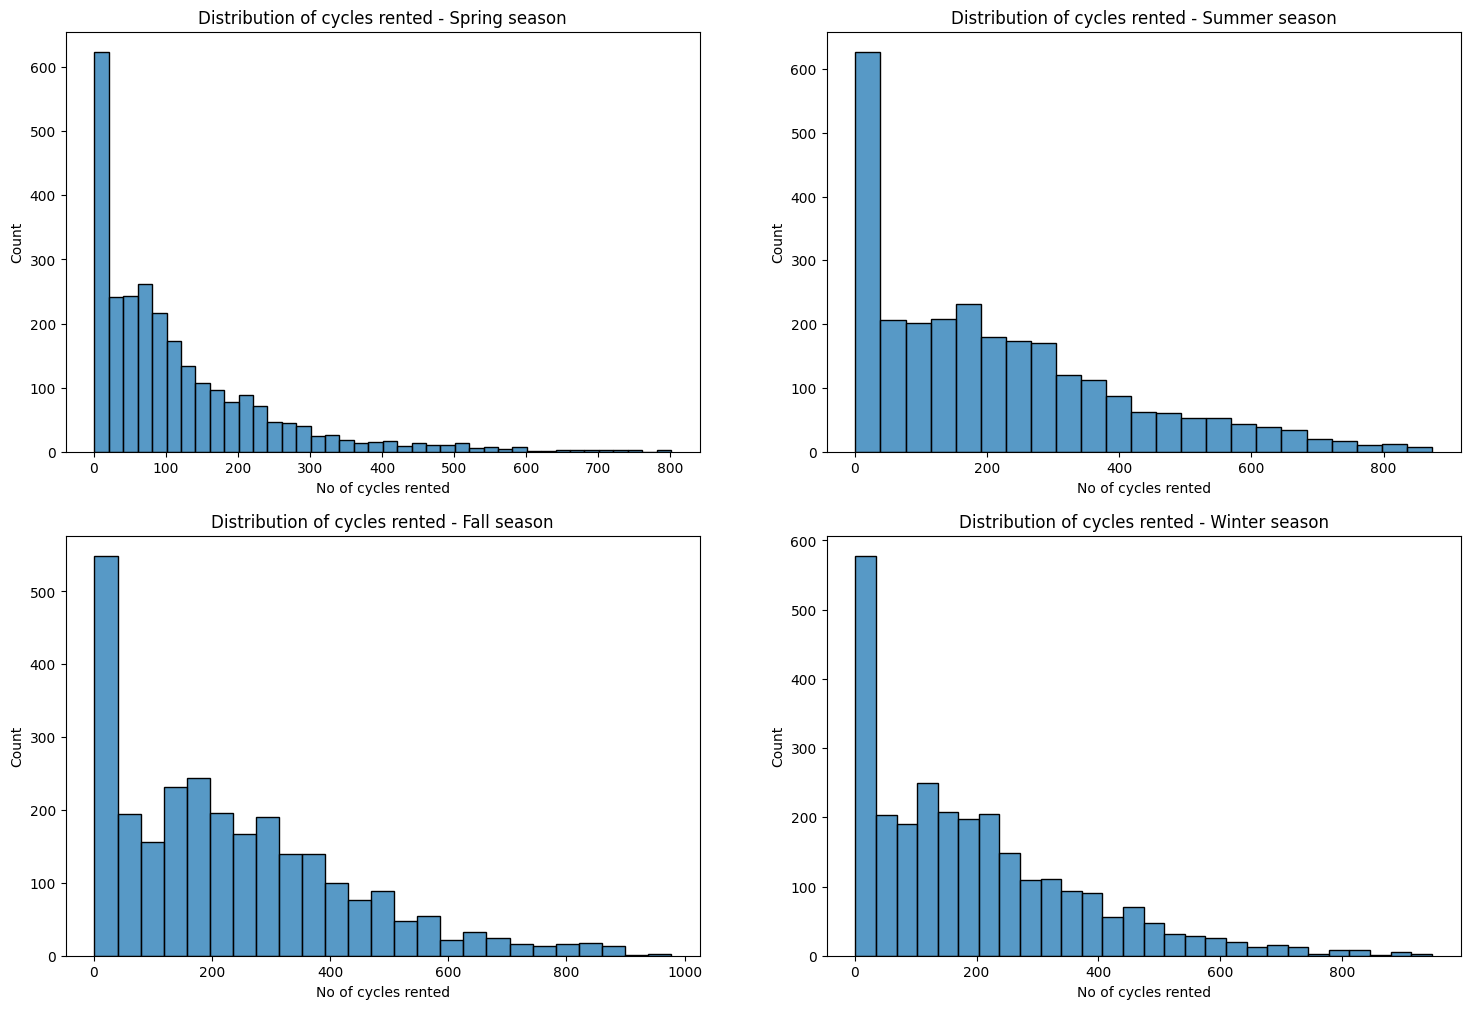

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

spring_season = df[df['season'] == 'Spring']['count']
summer_season = df[df['season'] == 'Summer']['count']
fall_season = df[df['season'] == 'Fall']['count']
winter_season = df[df['season'] == 'Winter']['count']

fig = plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.histplot(spring_season).set(title="Distribution of cycles rented - Spring season", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(2,2,2)
sns.histplot(summer_season).set(title="Distribution of cycles rented - Summer season", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(2,2,3)
sns.histplot(fall_season).set(title="Distribution of cycles rented - Fall season", xlabel='No of cycles rented', ylabel='Count')

plt.subplot(2,2,4)
sns.histplot(winter_season).set(title="Distribution of cycles rented - Winter season", xlabel='No of cycles rented', ylabel='Count')
plt.show()

All four distributions don't look normal. Let's also verify this statistically using shapiro wilkins test

In [ ]:
#Ho: Data is gaussian
#Ha: Data is not gaussian
from scipy.stats import shapiro
shapiro_stat, p_value = shapiro(spring_season)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Spring season does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Spring follows normal distribution')
shapiro_stat, p_value = shapiro(summer_season)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Summer season does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Summer season follows normal distribution')
shapiro_stat, p_value = shapiro(fall_season)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Fall season does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Fall season follows normal distribution')
shapiro_stat, p_value = shapiro(winter_season)
alpha = 0.05
print(shapiro_stat, p_value)
if p_value < alpha:
  print('Distribution of cycles rented - Winter season does not follow normal distribution')
else:
  print ('Distribution of cycles rented - Winter season follows normal distribution')

0.808627390346232 8.694772351355394e-49
Distribution of cycles rented - Spring season does not follow normal distribution
0.9004818080893252 6.039374406270491e-39
Distribution of cycles rented - Summer season does not follow normal distribution
0.9148166372899196 1.043680518918597e-36
Distribution of cycles rented - Fall season does not follow normal distribution
0.8954637482095505 1.1299244409282836e-39
Distribution of cycles rented - Winter season does not follow normal distribution


It's statistically verified that all four season categories don't follow normal distribution.

Let's also check if the variances in each of the groups are approximately equal

In [ ]:
#Ho: Variances across the groups are same
#Ha: Variances across groups are not same

from scipy.stats import levene
alpha = 0.05
levene_stat, p_value = levene(spring_season, summer_season, fall_season, winter_season)
print(levene_stat, p_value)
if p_value < alpha:
  print('Variances across four season categories are not the same')
else:
  print ('Variances across four season categories are same')

187.7035769668992 1.1170990373788981e-118
Variances across four season categories are not the same


Since both test of normality and variances failed, ANOVA cannot be applied here

So, we go for a test which deosn't require the above assumptions to be true, kruskal walls test

In [ ]:
#Ho: Season does not affect the number of cycles rented
#Ha: Atleast one type of season affects the number of cycles rented
from scipy.stats import kruskal
alpha = 0.05
kruskal_stat, p_value = kruskal(spring_season, summer_season, fall_season, winter_season)
print(kruskal_stat, p_value)
if p_value < alpha:
  print('Atleast one type of season affects the number of cycles rented')
else:
  print ('Season does not affect the number of cycles rented')

699.8821417617874 2.2263612957303657e-151
Atleast one type of season affects the number of cycles rented


From Kruskal Walls test, we conclude **atleast one season pattern affects the no of cycles rented.**

**Advanced Analysis:**
Note: The conclusions from the following tests are not statistically valid as assumptions for 2 Sample T Test are not met.

Let's check which group affects more by doing 2 Sample T-Tests


In [ ]:
from scipy.stats import ttest_ind
alpha = 0.05
t_stat, p_value = ttest_ind(spring_season, summer_season, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Spring season increases the number of cycles rented compared to summer season ')
else:
  print ('Spring and Summer season have same effect on the number of cycles rented')

t_stat, p_value = ttest_ind(summer_season, fall_season, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Summer season increases the number of cycles rented compared to fall season')
else:
  print ('Summer and Fall season have same effect on the number of cycles rented')

t_stat, p_value = ttest_ind(fall_season, winter_season, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Fall season increases the number of cycles rented compared to Winter season')
else:
  print ('Fall and Winter season have same effect on the number of cycles rented')

t_stat, p_value = ttest_ind(spring_season, winter_season, alternative='greater')
print(t_stat, p_value)
if p_value < alpha:
  print('Spring season increases the number of cycles rented compared to Winter season')
else:
  print ('Spring and Winter season have same effect on the number of cycles rented')

-22.416764721322846 1.0
Spring and Summer season have same effect on the number of cycles rented
-3.6407918229052068 0.9998628421941376
Summer and Fall season have same effect on the number of cycles rented
6.980360925184712 1.6471798336237476e-12
Fall season increases the number of cycles rented compared to Winter season
-19.764499867475635 1.0
Spring and Winter season have same effect on the number of cycles rented


**Hypothesis Testing**

3. Does weather depend on the season?

Weather column has three categories(Clear, Misty, LightSnow/Rain) after removing HeavySnow/Rain category for lack of data. Season column has four categories(Spring, Summer, Fall, Winter). Since both comparison columns are categorical, we should use **chi square test of independence** to check if weather is dependent on season.

Let's first create the contingency table for the relationship between season and weather

In [ ]:
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,Clear,LightSnow/Rain,Misty
season,,,
Fall,1930,199,604
Spring,1759,211,715
Summer,1801,224,708
Winter,1702,225,807


In [ ]:
#Ho: Season and Weather are not dependent on each other
#Ha: Season and Weather affect each other and are dependent
from scipy.stats import chi2_contingency
from scipy.stats import chi2
alpha = 0.05
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(chi2,round(p, 4),dof, expected)
if p < alpha:
  print('Season and Weather affect each other and are dependent')
else:
  print ('Season and Weather are not dependent on each other')

46.10145731073249 0.0 6 [[1805.76352779  215.67726229  711.55920992]
 [1774.04869086  211.8892972   699.06201194]
 [1805.76352779  215.67726229  711.55920992]
 [1806.42425356  215.75617823  711.81956821]]
Season and Weather affect each other and are dependent


From chi square test of independence, it's concluded **that Season and weather impact each other and are dependent**

**Recommendations/Observations**

* The observation of usage pattern for years 2011, 2012 indicates a growing business with increased adoption YoY. The concern on the recent dip (2012 December) is due to expected pattern of low usage during winter. As this dip is seasonal in nature, Yulu should not be overly concerned as the business itself is growing.
* Evening 5-6 PM and Morning 8 AM are most popular times in a day for electric bike usage. The timings aligns with popular office commute times in morning and evening.Yulu should optimize the availability and operations for increased usage during these times.
* Based on hypothesis testing, we can conclude that Working/Non-Working days don't affect the users count significantly. Although count plot indicates a small increase in usage on Working days, it's not statistically significant and therefore does not affect the revenue much.
* To achieve the mission of eliminating traffic congestion completely, there should be more adoption on working days. Since, this has not beeen observed, it's possible that users are still using for leisure and not for everyday commute. This finding should be taken seriously to look into why working professionals are not using the service as much as expected. Look into opportunities to collaborate with workplaces to offer exclusive promotions and incentives
* Holidays/Non-Holidays also don't affect the users count significantly. During holidays, there might be more demand in different public places(Gallery, beach, park etc) against usual public places(metro stations, bus stands, office spaces, residential areas, corporate offices, etc). Yulu should focus on improving availability in holiday specific public places during holidays
* From Hypothesis testing results, we can clearly observe that season affects the count of users at any given day. Yulu should make their operations efficient and adjust availability of electric vehicles based on season. As the usage is expected to be less during winter and spring, availability should be decreased to avoid wastage of resources. Conversely, there should be more vehicles available during summer and fall seasons
* Also, it's observed that weather impacts the usage on a given day. Given that there is more usage in Clear/Misty weather when compared to Light Rain/Snowy weather, the electric cycle inventory should be adjusted accordingly
* From hypothesis testing results, we also see a strong correlation between season and weather. Since both were proven to independently impact Yulu's business, there should be increased importance given to these variables. Models should be created to predict these variables as close to actual as possible. This will result in improved operational efficiency and decreased wastage of resources.